### Import des différentes librairies python

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import date
import calendar
import datetime
from dateutil import parser
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV   #Perforing grid search
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Accès aux fichiers

In [0]:
# notre code a été fait sur google colab une plateforme de codes interactives de google. L'accès à nos fichiers se font donc via google drive avec le code ci-dessous

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import seaborn as sns

# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Download du fichier
id = '1mKuHkhh0nLQOVngwxU_qwoJ7GKdiNOv9'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('trainClean.csv')

id2 = '1P6wi_nrxzkN7JiLaMpK8vJMZnnf1Vf5j'
downloaded2 = drive.CreateFile({'id': id2})
downloaded2.GetContentFile('testClean.csv')

id3 = '1IjtruCqWCS6wpSpvSSMEuVbhWphVSV8X'
downloaded2 = drive.CreateFile({'id': id3})
downloaded2.GetContentFile('gdp.csv')

data = pd.read_csv("trainClean.csv" ,sep=";", error_bad_lines=False,encoding="ISO-8859-1")
#data = data[:300000]
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,1,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unkno

### Analyse des colonnes

In [0]:
# On analyse chaque colonne pour récupérer le nombre de valeurs unique au sein de celle ci
def getUniqueValue(data):
    uniquevalue = []
    for i in list(data): #cherche dans le noms des colonnes
        uniquevalue.append(data[i].nunique())
    return pd.DataFrame(uniquevalue, list(data), columns=['UniqueValue'])
uniquevalue = getUniqueValue(data)
print(uniquevalue[:])

                                     UniqueValue
Unnamed: 0                                903653
channelGrouping                                8
date                                         366
fullVisitorId                             723803
sessionId                                 902755
socialEngagementType                           1
visitId                                   886303
visitNumber                                  384
visitStartTime                            887159
browser                                       54
browserVersion                                 1
browserSize                                    1
operatingSystem                               20
operatingSystemVersion                         1
isMobile                                       2
mobileDeviceBranding                           1
mobileDeviceModel                              1
mobileInputSelector                            1
mobileDeviceInfo                               1
mobileDeviceMarketin

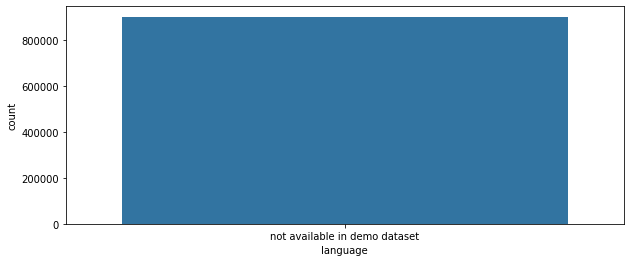

In [0]:
# on plot les différentes valeurs de la colonne language
plt.figure(figsize=(10,4))
sns.countplot(x ='language', data=data)

,Total,Percent
campaignCode,903652,0.999999
adContent,892707,0.987887
transactionRevenue,892138,0.987257
adwordsClickInfo.isVideoAd,882193,0.976252
adwordsClickInfo.adNetworkType,882193,0.976252


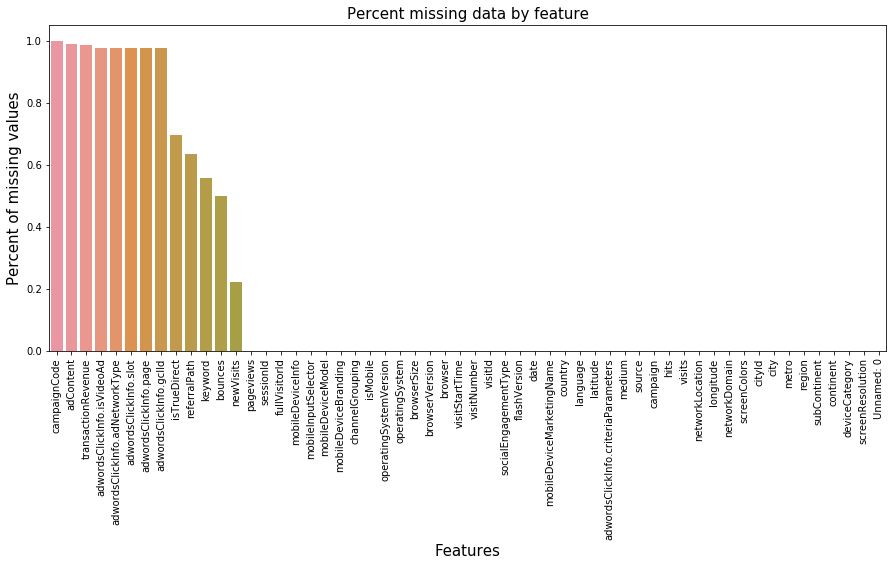

In [0]:
# on détermine le nombre de nan pour chaque colonne et on plot le résultat
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

### On supprime les colonnes sans variance

In [0]:
data.drop(["Unnamed: 0", "socialEngagementType", "adwordsClickInfo.criteriaParameters",
            "browserVersion", "browserSize", "operatingSystemVersion", "mobileDeviceBranding",
            "mobileDeviceModel", "mobileInputSelector", "mobileDeviceInfo", "mobileDeviceMarketingName",
            "flashVersion", "language", "screenColors", "screenResolution", "cityId", "latitude" , "longitude",
            "networkLocation", "visits", "campaignCode"], axis=1,inplace=True)

### On retire les doublons

In [0]:
# ces colonnes font doublons avec fullVisitorId et visitNumber
data.drop(["sessionId", "visitId" ], axis=1,inplace=True)

In [0]:
data.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent
0,Organic Search,20160902,1131660440785968503,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,1,1472880147,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,1,1472865386,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,1,1472881213,UC Browser,Linux,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1.0,1.0,1.0,NaN,(not set),google,organic,google + online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1.0,1.0,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Seconde analyse des colonnes après ces pré processings

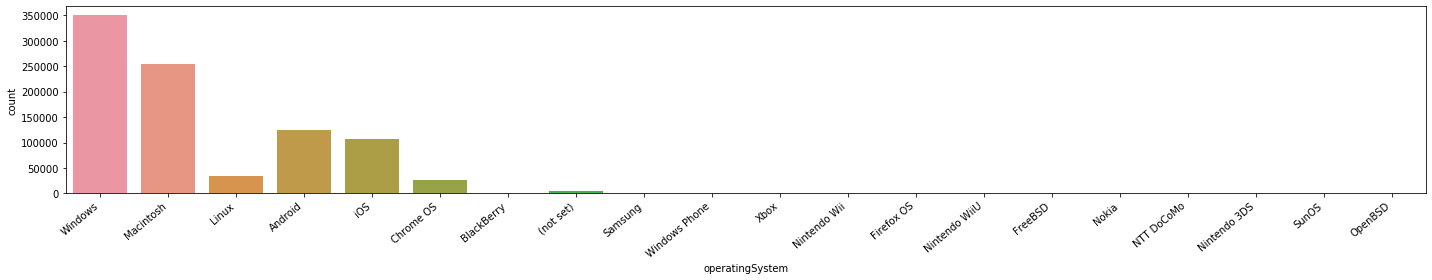

In [0]:
# On affiche la répartition des informations de Operating System
plt.figure(figsize=(20,4))
ax0 = sns.countplot(x ='operatingSystem', data=data)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

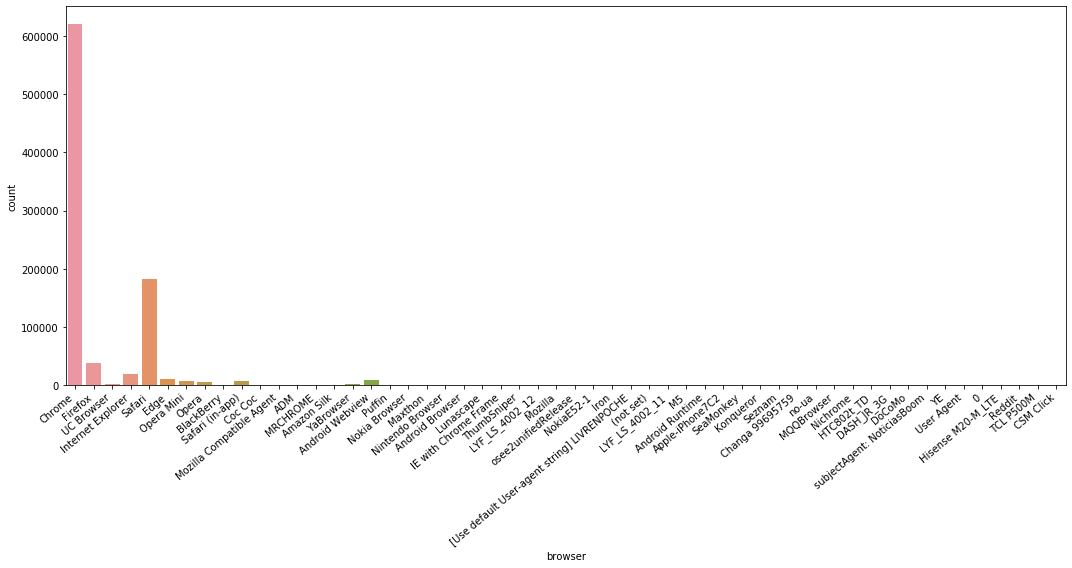

In [0]:
# On affiche la répartition des informations de Browser
plt.figure(figsize=(15,8))
ax = sns.countplot(x ='browser', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


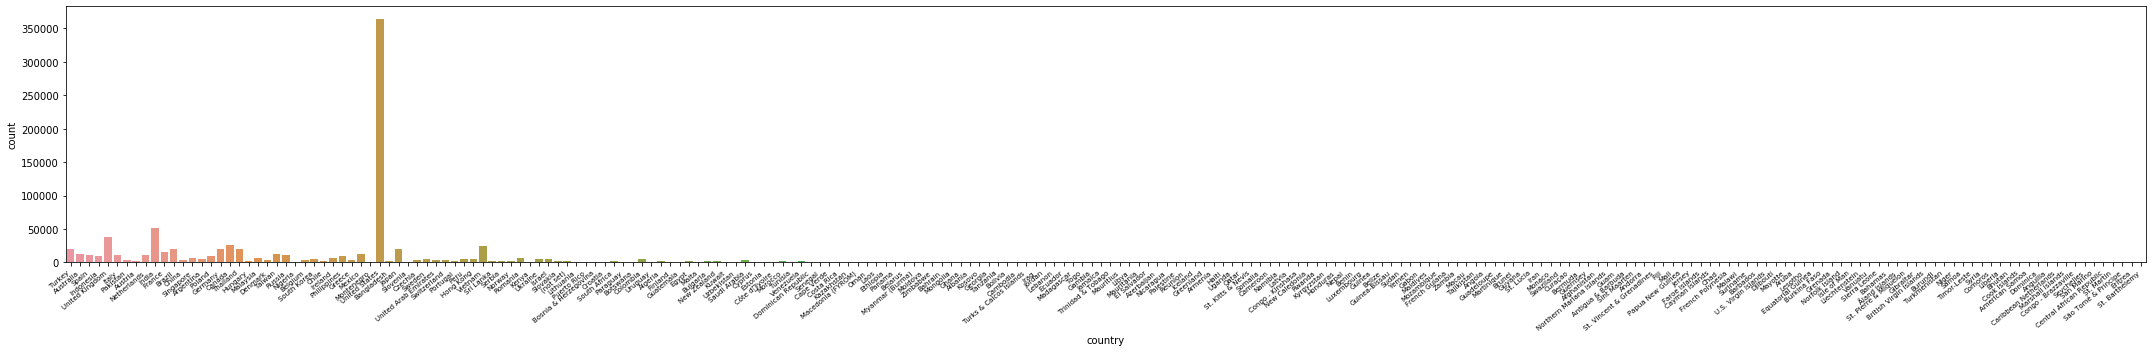

In [0]:
# On affiche la répartition des informations de Country
plt.figure(figsize=(30,5))
ax = sns.countplot(x ='country', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize= 7, ha="right")
plt.tight_layout()

Visualisation graphique des données géographiques en fonction des revenus de joueurs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(11515, 4)


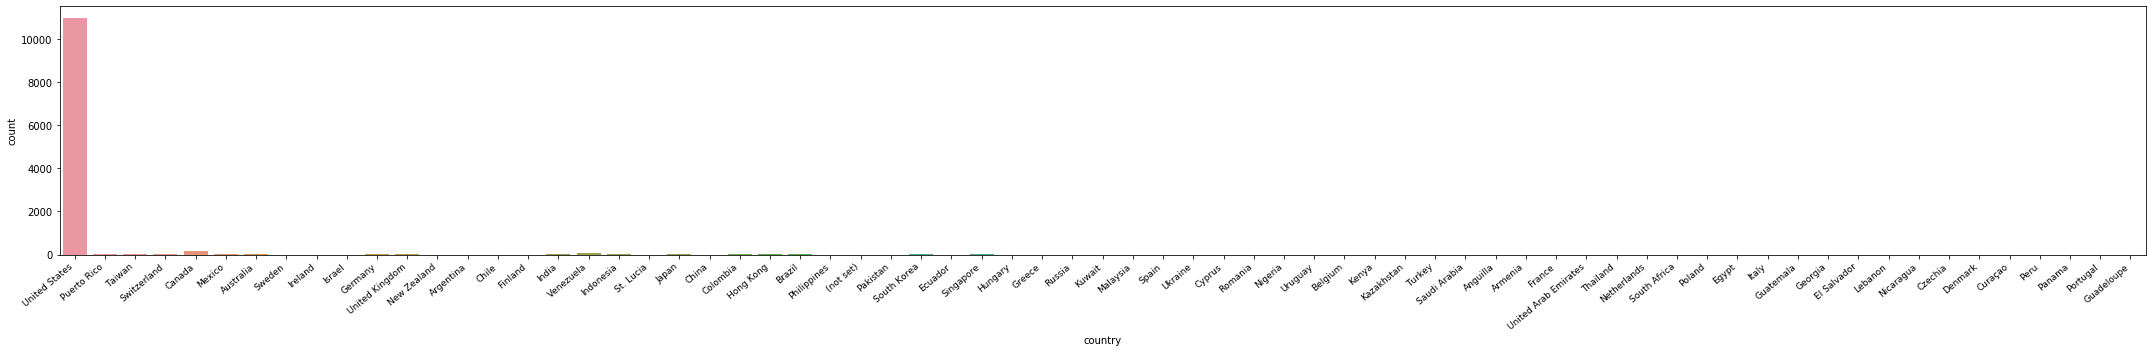

In [0]:
# on creait un dataframe avec les données géographique et la colonne Transaction revenue
df2 = data[['transactionRevenue','city','country','subContinent']]
df2.dropna(subset=['transactionRevenue'],inplace=True)
print(df2.shape)

# On plot la somme de transaction revenue par pays
plt.figure(figsize=(30,5))
ax1 = sns.countplot(x='country',data=df2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, fontsize= 9, ha="right")
plt.tight_layout()

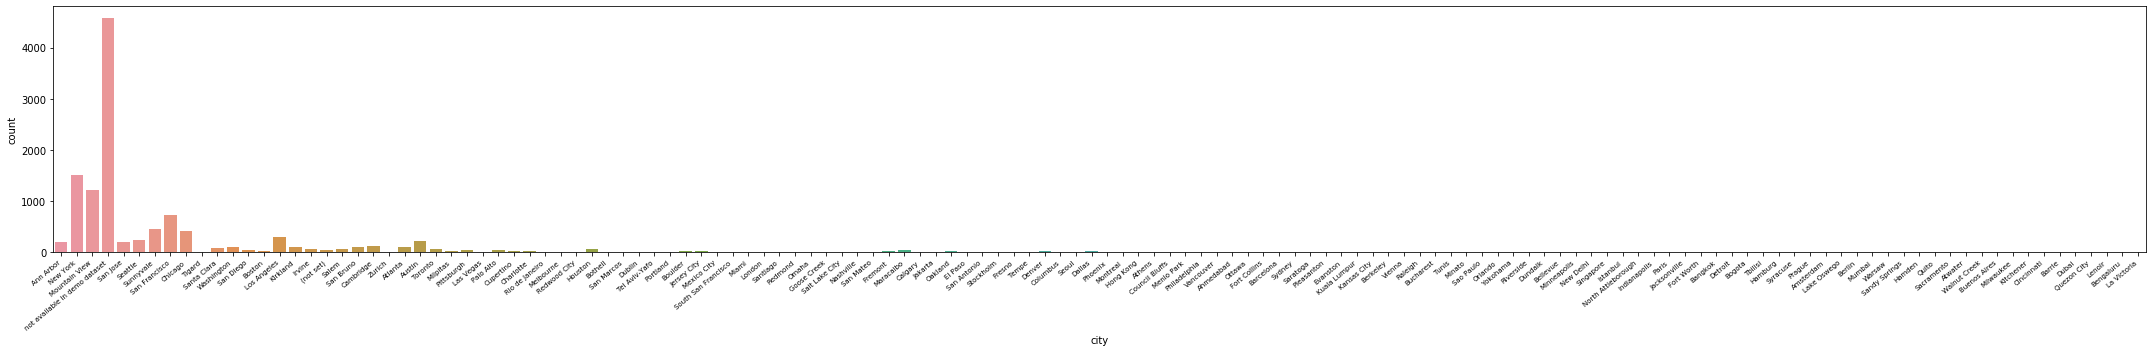

In [0]:
# On affiche la répartition des informations de city
plt.figure(figsize=(30,5))
ax2 = sns.countplot(x='city',data=df2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, fontsize= 7, ha="right")
plt.tight_layout()

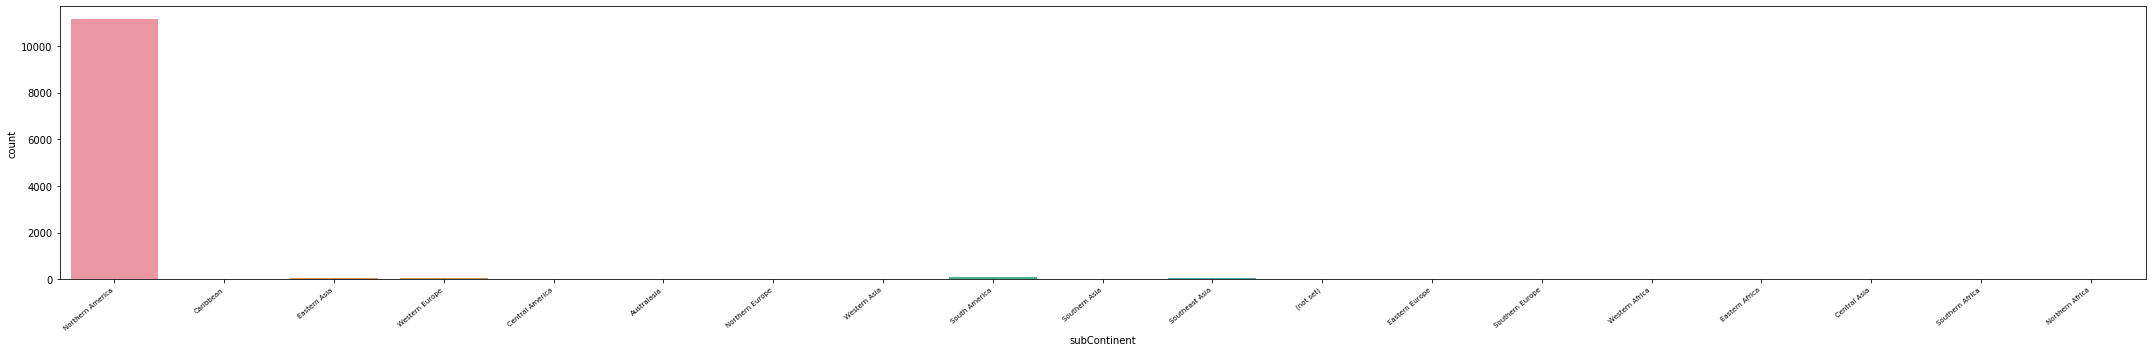

In [0]:
# On plot la somme de transaction revenue par sous-continent
plt.figure(figsize=(30,5))
ax3 = sns.countplot(x='subContinent',data=df2)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, fontsize= 7, ha="right")
plt.tight_layout()

### On remplace les NA

In [0]:
# on utilise la méthode .fillna() des dataframe pour répérer et remplacer les na par une valeure choisie.

data.bounces.fillna(0,inplace=True)

data.newVisits.fillna(0,inplace=True)

data["transactionRevenue"].fillna(0,inplace=True)

data.isTrueDirect.fillna(False,inplace=True)

data.referralPath.fillna("unknown",inplace=True)

data["adwordsClickInfo.page"].fillna(0,inplace=True)

data["adwordsClickInfo.slot"].fillna(0,inplace=True)

data["adwordsClickInfo.gclId"].fillna("unknown",inplace=True)

data["adwordsClickInfo.adNetworkType"].fillna("unknown",inplace=True)

data["adwordsClickInfo.isVideoAd"].fillna(1,inplace=True)

data["adContent"].fillna("unknown",inplace=True)

data["pageviews"].fillna(0,inplace=True)

data["bounces"].fillna(0,inplace=True)

data["newVisits"].fillna(0, inplace=True)

data["adwordsClickInfo.page"].fillna(0, inplace=True)

#On remplace true et false par 1 et 0 
data["isMobile"] = data["isMobile"].replace(True,1)

data["isTrueDirect"] = data["isTrueDirect"].replace([True, False], [1,0])

data["adwordsClickInfo.isVideoAd"] = data["adwordsClickInfo.isVideoAd"].replace([True, False], [1,0])


In [0]:
data.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent
0,Organic Search,20160902,1131660440785968503,1,1472830385,Chrome,Windows,0.0,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1.0,1.0,1.0,0.0,(not set),google,organic,(not provided),0,unknown,0.0,0,unknown,unknown,1,unknown
1,Organic Search,20160902,377306020877927890,1,1472880147,Firefox,Macintosh,0.0,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1.0,1.0,1.0,0.0,(not set),google,organic,(not provided),0,unknown,0.0,0,unknown,unknown,1,unknown
2,Organic Search,20160902,3895546263509774583,1,1472865386,Chrome,Windows,0.0,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1.0,1.0,1.0,0.0,(not set),google,organic,(not provided),0,unknown,0.0,0,unknown,unknown,1,unknown
3,Organic Search,20160902,4763447161404445595,1,1472881213,UC Browser,Linux,0.0,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1.0,1.0,1.0,0.0,(not set),google,organic,google + online,0,unknown,0.0,0,unknown,unknown,1,unknown
4,Organic Search,20160902,27294437909732085,2,1472822600,Chrome,Android,1.0,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1.0,1.0,0.0,0.0,(not set),google,organic,(not provided),1,unknown,0.0,0,unknown,unknown,1,unknown


### Gestion des dates : Extraction d'informations sur le fait de savoir si c'est un jour de semaine ou de week end ainsi que le mois de la connexion

In [0]:
is_weekday = []
month = []

for day_date in data["date"]:
    day_date = datetime.datetime.strptime(str(day_date), '%Y%m%d').date()
#     print(day_date)
    current_day = day_date.weekday()
    month.append(day_date.month)
    
    if current_day <5:
        is_weekday.append(0)
    else:
        is_weekday.append(1)
        
data["is_weekday"] = is_weekday
data["month"] = month
data['month'] = data['month'].astype(object)

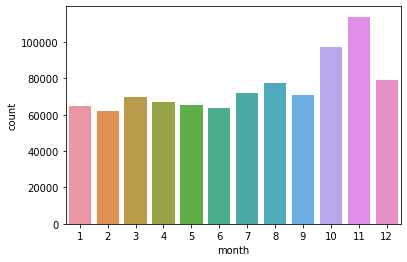

In [0]:
sns.countplot(x="month",data=data)

### Gestion de l'heure de la session : Determiner la période la journée à laquelle correspond la connexion

In [0]:
# On transforme l'heure d'arrivée en seconde en données catégorielles avec matin,apres midi et soirée
from datetime import datetime

time_session=[]

for starttimevisit in data["visitStartTime"]:
    current_start_time_visit = datetime.fromtimestamp(starttimevisit)
    if current_start_time_visit.hour>=6 and current_start_time_visit.hour<12:
        time_session.append("morning")
    
    if current_start_time_visit.hour>=12 and current_start_time_visit.hour<20:
        time_session.append("afternoon")
        
    if current_start_time_visit.hour>=20:
        time_session.append("night")
    
    if current_start_time_visit.hour<6:
        time_session.append("night")

data["connexion_period"]=time_session

In [0]:
data.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,is_weekday,month,connexion_period
0,Organic Search,20160902,1131660440785968503,1,1472830385,Chrome,Windows,0.0,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1.0,1.0,1.0,0.0,(not set),google,organic,(not provided),0,unknown,0.0,0,unknown,unknown,1,unknown,0,9,afternoon
1,Organic Search,20160902,377306020877927890,1,1472880147,Firefox,Macintosh,0.0,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1.0,1.0,1.0,0.0,(not set),google,organic,(not provided),0,unknown,0.0,0,unknown,unknown,1,unknown,0,9,night
2,Organic Search,20160902,3895546263509774583,1,1472865386,Chrome,Windows,0.0,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1.0,1.0,1.0,0.0,(not set),google,organic,(not provided),0,unknown,0.0,0,unknown,unknown,1,unknown,0,9,night
3,Organic Search,20160902,4763447161404445595,1,1472881213,UC Browser,Linux,0.0,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1.0,1.0,1.0,0.0,(not set),google,organic,google + online,0,unknown,0.0,0,unknown,unknown,1,unknown,0,9,night
4,Organic Search,20160902,27294437909732085,2,1472822600,Chrome,Android,1.0,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1.0,1.0,0.0,0.0,(not set),google,organic,(not provided),1,unknown,0.0,0,unknown,unknown,1,unknown,0,9,afternoon


### Aggreger les données par joueur sur la colonne : fullVisitorId

In [0]:
data['date'] = data['date'].astype(object)
data['visitStartTime'] = data['visitStartTime'].astype(object)

aggregate_data = data.groupby("fullVisitorId").agg({
    "date" : "count",
    "visitStartTime" : "count",
    "hits" : "sum",
    "pageviews" : "sum",
    "bounces" :"sum",
    "newVisits" : "count",
    "transactionRevenue" : "sum",
    "isMobile" : "max",
    "deviceCategory" : "count",
    "continent" : 'count',
    "subContinent" : 'count',
    'country' : 'count',
    'region' : 'count',
    'city' : 'count',
    'networkDomain' : 'count',
    'isTrueDirect' : "max",
    "operatingSystem" : 'count',
    "adwordsClickInfo.page" :"sum",
    'adwordsClickInfo.slot' : 'count',
    'adwordsClickInfo.gclId' :'count',
    'adwordsClickInfo.adNetworkType' : 'count',
    "adwordsClickInfo.isVideoAd" : "max",
    "adContent" : 'count',
    "keyword" : "count",
    "source" : 'count',
    "medium" : "count",
    "campaign" : "count",
    "month" : "count"
    })

# création d'une nouvelle colonne correspondant à la colonne hits multiplié par la colonne pageviews.
aggregate_data['hits_page_views'] = aggregate_data['hits'] * aggregate_data['pageviews']

aggregate_data.head()

,date,visitStartTime,hits,pageviews,bounces,newVisits,transactionRevenue,isMobile,deviceCategory,continent,subContinent,country,region,city,networkDomain,isTrueDirect,operatingSystem,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,keyword,source,medium,campaign,month,hits_page_views
fullVisitorId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4823595352351,1,1,1,1.0,1.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,0,1,1,1,1,1.0
5103959234087,1,1,10,8.0,0.0,1,0.0,1.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,1,1,1,1,1,80.0
10278554503158,1,1,11,8.0,0.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,1,1,1,1,1,88.0
20424342248747,1,1,17,13.0,0.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,1,1,1,1,1,221.0
26722803385797,1,1,3,2.0,0.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,1,1,1,1,1,6.0


In [0]:
# Nous créons un second dataframe aggregé pour pouvoir créer de nouvelles colonnes dans le dataframe
aggregate_data2 = data.groupby("fullVisitorId").agg(
    number_of_session = ('date', 'count'),
    last_visit =('date', max),
    first_visit=('date', min),
    sum_hits = ('hits',sum),
    country_name = ('country','first')
)
print("done aggregate")

done aggregate


In [0]:
# on créait deux nouvelles colonnes : le temps écoulé entre la première et et denière date de connexion et le nombre de clique moyen par connexion
difference_time_session = []
mean_hits_per_session = []

for i in range(len(aggregate_data2)):
  difference_time_session.append(aggregate_data2.at[aggregate_data2.index[i], 'last_visit']- aggregate_data2.at[aggregate_data2.index[i], 'first_visit'])
  mean_hits_per_session.append(aggregate_data2.at[aggregate_data2.index[i], 'sum_hits']/aggregate_data2.at[aggregate_data2.index[i], 'number_of_session'])

aggregate_data2['difference_time_session'] = difference_time_session
aggregate_data2['mean_hits_per_session'] = mean_hits_per_session



aggregate_data2.drop(columns=['last_visit','first_visit', 'sum_hits', 'number_of_session'],inplace=True)
aggregate_data2

,country_name,difference_time_session,mean_hits_per_session
fullVisitorId,,,
4823595352351,China,0,1.0
5103959234087,United States,0,10.0
10278554503158,New Zealand,0,11.0
20424342248747,Peru,0,17.0
26722803385797,United Kingdom,0,3.0
...,...,...,...
9999470222842102470,Spain,0,8.0
9999493741609373843,Nigeria,0,1.0
9999607385222235728,India,0,1.0


In [0]:
# on fusionne nos nouvelles colonnes aves les données aggrégés
aggregate_data = aggregate_data.merge(aggregate_data2,on=aggregate_data.index,how='inner')
aggregate_data.rename(columns={"key_0" : "fullVisitorId"}, inplace=True)
aggregate_data.index = aggregate_data['fullVisitorId']
aggregate_data.drop(columns=["fullVisitorId"],inplace=True)
aggregate_data

,date,visitStartTime,hits,pageviews,bounces,newVisits,transactionRevenue,isMobile,deviceCategory,continent,subContinent,country,region,city,networkDomain,isTrueDirect,operatingSystem,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,keyword,source,medium,campaign,month,hits_page_views,country_name,difference_time_session,mean_hits_per_session
fullVisitorId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4823595352351,1,1,1,1.0,1.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,0,1,1,1,1,1.0,China,0,1.0
5103959234087,1,1,10,8.0,0.0,1,0.0,1.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,1,1,1,1,1,80.0,United States,0,10.0
10278554503158,1,1,11,8.0,0.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,1,1,1,1,1,88.0,New Zealand,0,11.0
20424342248747,1,1,17,13.0,0.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,1,1,1,1,1,221.0,Peru,0,17.0
26722803385797,1,1,3,2.0,0.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,1,1,1,1,1,6.0,United Kingdom,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999470222842102470,1,1,8,8.0,0.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,0,1,1,1,1,64.0,Spain,0,8.0
9999493741609373843,1,1,1,1.0,1.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,0,1,1,1,1,1.0,Nigeria,0,1.0
9999607385222235728,1,1,1,1.0,1.0,1,0.0,0.0,1,1,1,1,1,1,1,0,1,0.0,1,1,1,1,1,0,1,1,1,1,1.0,India,0,1.0


Gestion des données géographiques

In [0]:
geographic_features = ["continent", "subContinent", "region", "metro", "city", "country" ]

aggregate_data.drop(columns=["continent","region", "subContinent","city"],inplace=True)

On recupere le PIB de chaque pays (GDP en anglais)

In [0]:
GDP = pd.read_csv('gdp.csv')
last_GDP = GDP[GDP['Year']==2016]
last_GDP['Country Name'].unique()
last_GDP.rename(columns={"Country Name": "country_name", "Value" : "GDP"}, inplace=True)
last_GDP.drop(columns=["Country Code", "Year"],inplace=True)

quartile1, quartile2, quartile3 = last_GDP["GDP"].quantile([0.25,0.5,0.75])

categorial_gdp=[]

for gdp in last_GDP['GDP']:
    if gdp>=quartile3:
        categorial_gdp.append("high")
    elif gdp>=quartile2:
        categorial_gdp.append("middle_high")
    elif gdp>=quartile1:
        categorial_gdp.append("middle_low")
    else:
        categorial_gdp.append("low")

last_GDP['GDP'] = categorial_gdp

aggregate_data = aggregate_data.merge(last_GDP, on='country_name')

aggregate_data.drop(columns=['country_name'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


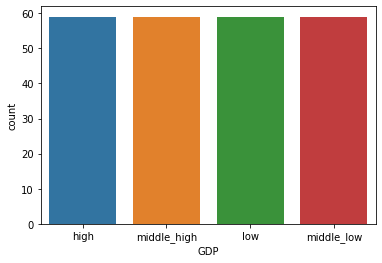

In [0]:
sns.countplot(x=last_GDP['GDP'],data=aggregate_data)

### Gestion des colonnes catégorielles

In [0]:
def onehotencode(df, df_col):
    one_hot_encode_df = pd.get_dummies(df_col,prefix=df_col.name)
    df = df.merge(one_hot_encode_df,on=one_hot_encode_df.index)
    df.drop(df_col.name, inplace=True, axis=1)
    df.drop("key_0", inplace=True, axis=1)
    return df

categorical_features = aggregate_data.select_dtypes(include=object).columns


for categorical_feature in categorical_features:
    print(categorical_feature)
    aggregate_data = onehotencode(aggregate_data, aggregate_data[categorical_feature])


GDP


### Corrélation des variables du jeux de données finale

In [0]:
corr = aggregate_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,date,visitStartTime,hits,pageviews,bounces,newVisits,transactionRevenue,isMobile,deviceCategory,country,networkDomain,isTrueDirect,operatingSystem,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,keyword,source,medium,campaign,month,hits_page_views,difference_time_session,mean_hits_per_session,GDP_high,GDP_low,GDP_middle_high,GDP_middle_low
date,1,1,0.618217,0.652605,0.617178,1,0.271083,-0.00423888,1,1,1,0.288715,1,0.169296,1,1,1,0.000484399,1,0.598031,1,1,1,1,0.402158,0.289127,0.07806,0.0516199,-0.00592056,-0.0466938,-0.0166595
visitStartTime,1,1,0.618217,0.652605,0.617178,1,0.271083,-0.00423888,1,1,1,0.288715,1,0.169296,1,1,1,0.000484399,1,0.598031,1,1,1,1,0.402158,0.289127,0.07806,0.0516199,-0.00592056,-0.0466938,-0.0166595
hits,0.618217,0.618217,1,0.991109,0.0641676,0.618217,0.431938,-0.0245696,0.618217,0.618217,0.618217,0.20831,0.618217,0.108295,0.618217,0.618217,0.618217,-0.0223169,0.618217,0.388979,0.618217,0.618217,0.618217,0.618217,0.517453,0.198579,0.606052,0.0918237,-0.00758337,-0.0849621,-0.0255318
pageviews,0.652605,0.652605,0.991109,1,0.0763282,0.652605,0.450025,-0.0238241,0.652605,0.652605,0.652605,0.216162,0.652605,0.114562,0.652605,0.652605,0.652605,-0.0240087,0.652605,0.411378,0.652605,0.652605,0.652605,0.652605,0.54275,0.210317,0.574975,0.0951812,-0.00811178,-0.08803,-0.0264916
bounces,0.617178,0.617178,0.0641676,0.0763282,1,0.617178,0.0191705,0.0159403,0.617178,0.617178,0.617178,0.140643,0.617178,0.106804,0.617178,0.617178,0.617178,0.0351968,0.617178,0.364615,0.617178,0.617178,0.617178,0.617178,0.0713944,0.137876,-0.222048,-0.050877,0.00283587,0.0471236,0.0144294
newVisits,1,1,0.618217,0.652605,0.617178,1,0.271083,-0.00423888,1,1,1,0.288715,1,0.169296,1,1,1,0.000484399,1,0.598031,1,1,1,1,0.402158,0.289127,0.07806,0.0516199,-0.00592056,-0.0466938,-0.0166595
transactionRevenue,0.271083,0.271083,0.431938,0.450025,0.0191705,0.271083,1,-0.0105762,0.271083,0.271083,0.271083,0.0289565,0.271083,0.0113944,0.271083,0.271083,0.271083,0.000589442,0.271083,0.143275,0.271083,0.271083,0.271083,0.271083,0.769706,0.0513312,0.0667655,0.0113886,-0.000944749,-0.0104969,-0.00327193
isMobile,-0.00423888,-0.00423888,-0.0245696,-0.0238241,0.0159403,-0.00423888,-0.0105762,1,-0.00423888,-0.00423888,-0.00423888,0.111029,-0.00423888,0.0553512,-0.00423888,-0.00423888,-0.00423888,-0.0614049,-0.00423888,0.124829,-0.00423888,-0.00423888,-0.00423888,-0.00423888,-0.00369776,-0.00791801,-0.0137796,0.110273,0.000959067,-0.105317,-0.0250677
deviceCategory,1,1,0.618217,0.652605,0.617178,1,0.271083,-0.00423888,1,1,1,0.288715,1,0.169296,1,1,1,0.000484399,1,0.598031,1,1,1,1,0.402158,0.289127,0.07806,0.0516199,-0.00592056,-0.0466938,-0.0166595
country,1,1,0.618217,0.652605,0.617178,1,0.271083,-0.00423888,1,1,1,0.288715,1,0.169296,1,1,1,0.000484399,1,0.598031,1,1,1,1,0.402158,0.289127,0.07806,0.0516199,-0.00592056,-0.0466938,-0.0166595


Text(0.5, 1, 'Correlation')

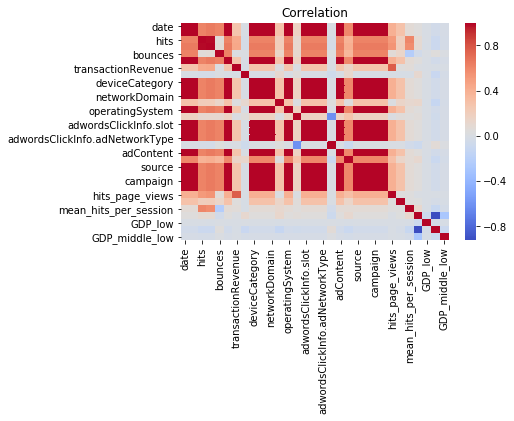

In [0]:
sns.heatmap(corr,cmap='coolwarm')
plt.title('Correlation')

### Création et entrainement des modèles

In [0]:
# On split train et test
train, test = train_test_split(aggregate_data, test_size=0.2)
x_pred = train.transactionRevenue.values
train.drop(["transactionRevenue"] ,axis=1, inplace=True)

y_pred = test.transactionRevenue.values
test.drop(["transactionRevenue"] ,axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
# Fontion qui permet de ploter les R2 moyen des modèles (graph ci-dessous)
def graphModele(rfr,gbr,lr,ada):
    mod = pd.DataFrame({'Random Forest Regressor': mean_r2_score(number_of_iteration=10,model=rfr,train=train),
                        'Gradient Boosting Regressor' : mean_r2_score(number_of_iteration=1,model=gbr,train=train),
                        'Linear Regression': mean_r2_score(number_of_iteration=1,model=lr,train=train),
                        'Ada Boost Regressor': mean_r2_score(number_of_iteration=3,model=ada,train=train)
                        }, index=[0])
    plt.figure(figsize=(10,5))
    sns.barplot(data=mod)
    plt.title("Mean Average of Modeles")


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


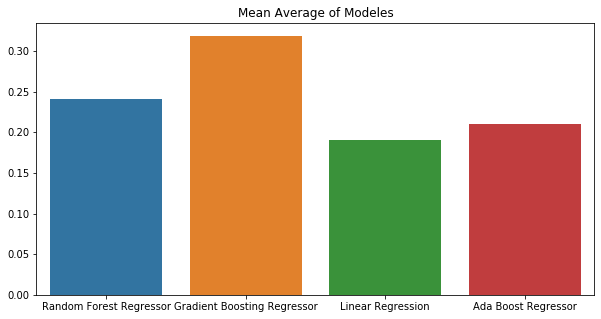

In [0]:
# création d'une fonction qui permet d'entrainer les modèles plusieurs fois et de retourner le R2 moyen de ces modèles (permet de pondérer l'aspect random d'un random forest par exemple)
def mean_r2_score(number_of_iteration,model,train):
  average_score = []
  model.fit(train ,x_pred)
  average_score.append(model.score(test,y_pred))

  return sum(average_score) / len(average_score)

rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
lr = LinearRegression()
ada = AdaBoostRegressor()

graphModele(rfr,gbr,lr,ada)

                                importance
hits                              0.390400
adContent                         0.134662
adwordsClickInfo.slot             0.092399
date                              0.088975
pageviews                         0.084358
newVisits                         0.062579
hits_page_views                   0.060347
networkDomain                     0.029608
difference_time_session           0.018342
bounces                           0.011427
month                             0.007042
mean_hits_per_session             0.005731
visitStartTime                    0.005234
keyword                           0.002999
adwordsClickInfo.adNetworkType    0.001935
medium                            0.000986
adwordsClickInfo.page             0.000971
deviceCategory                    0.000662
adwordsClickInfo.gclId            0.000466
campaign                          0.000396
operatingSystem                   0.000241
country                           0.000177
isTrueDirec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


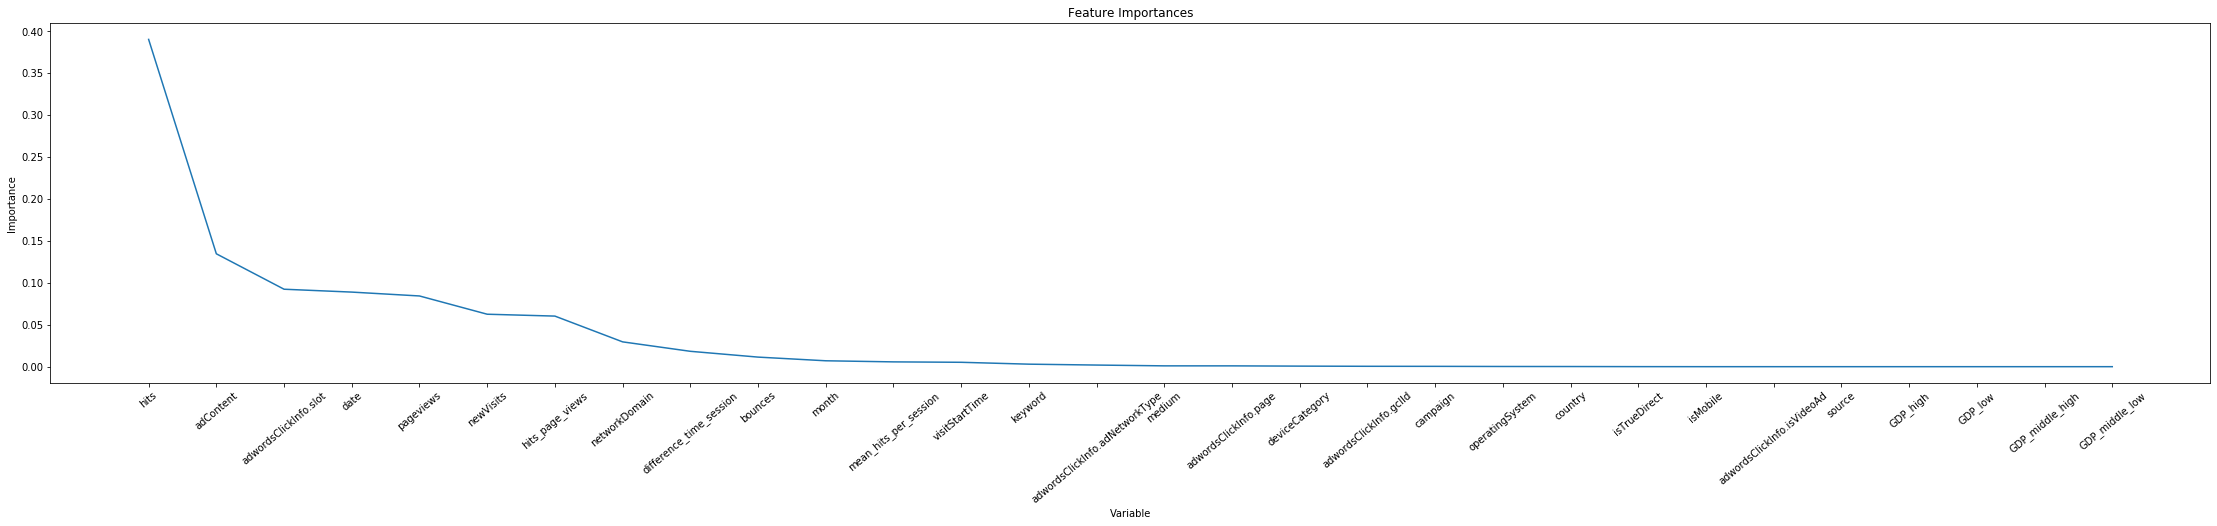

In [0]:
#Features importance à partir du GBR
import matplotlib.pyplot as plt
model = gbr
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

fig1 = plt.figure(figsize=(30,5))
ax = fig1.add_axes([0,0,1,1])
ax.plot(feature_importances.axes[0],feature_importances)
ax.set_xlabel('Variable')
plt.xticks(rotation=40)
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')
plt.tight_layout()

### Optimisation du modèle GBR

In [0]:
# Optimisation du n_estimator (The number of boosting stages to perform.)
for estimator in range(10, 100 , 10):
  model = GradientBoostingRegressor(n_estimators=estimator)
  model.fit(train,x_pred)
  print(f"Estimator : {estimator}. R2 : {model.score(test,y_pred)}")

Estimator : 10. R2 : 0.20538433621127183
Estimator : 20. R2 : 0.2788513564295162
Estimator : 30. R2 : 0.30493915028137997
Estimator : 40. R2 : 0.32251785002763333
Estimator : 50. R2 : 0.337269687501043
Estimator : 60. R2 : 0.337073212381238
Estimator : 70. R2 : 0.33839462330846914
Estimator : 80. R2 : 0.3305431502444821
Estimator : 90. R2 : 0.3191705283164631


In [0]:
# Optimisation du learning rate (learning rate shrinks the contribution of each tree by learning_rate.)
learningRate = [0.01,0.05, 0.1, 0.2, 0.5]
for learning_rate in learningRate:
  model = GradientBoostingRegressor(learning_rate=learning_rate)
  model.fit(train,x_pred)
  print(f"Learning_rate : {learning_rate}. R2 : {model.score(test,y_pred)}")

Learning_rate : 0.01. R2 : 0.19811300667886822
Learning_rate : 0.05. R2 : 0.3317305924560525
Learning_rate : 0.1. R2 : 0.31478968500961224
Learning_rate : 0.2. R2 : 0.31009492827248675
Learning_rate : 0.5. R2 : 0.020385597174262023


In [0]:
tuned_gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50)
tuned_gbr.fit(train,x_pred)
tuned_gbr.score(test,y_pred)

0.22589082979273956